# CW11 - Plot Fourier Expansion

In our analysis of the the [Damped Driven Harmonic Oscillator](), we found that the long term solution for a sinusoidal driving force is a sinusoidal motion with the same frequency as the driving force. So for a particular driving force at a frequency $\omega$:

$$f(t) = f_0 \cos(\omega t),$$

we found the long term solution to be:

$$x(t) = A \cos(\omega t - \delta)$$

where $A$ and $\delta$ are determined by the driving force and the natural frequency of the oscillator, $\omega_0$.

The amplitude $A$ and phase $\delta$ are given by:

$$A = \frac{f_0}{m \sqrt{(\omega_0^2 - \omega^2)^2 + (b \omega)^2}}$$

$$\delta = \arctan\left(\frac{b \omega}{\omega_0^2 - \omega^2}\right)$$

## Periodic but not sinusoidal driving force

What if the driving force where periodic with some period $\tau$ but not sinusoidal? For example, consider the following driving force:

$$f(t) = \begin{cases} 0 & \text{if } 0 \leq t < \tau/2 \\ f_0 & \text{if } \tau/2 \leq t < \tau \end{cases}$$

That force is plotted below:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

%matplotlib inline
plt.style.use('seaborn-v0_8-colorblind')

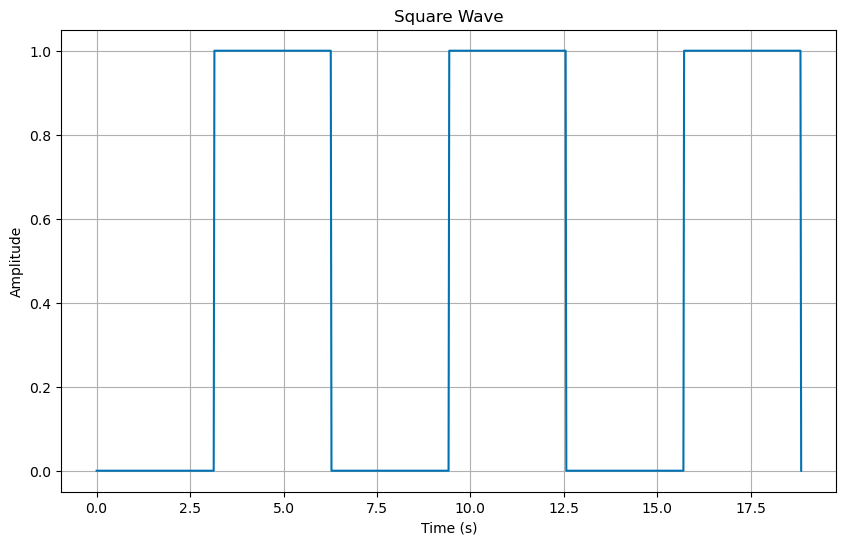

In [19]:
tau = 2*np.pi
t = np.linspace(0, 3*tau, 1000)
f0 = 1

# Create a square wave with an amplitude of f0 and a period of tau
def square_wave(t, f0, tau):
    ## Notice that the definition of the sqaure wave and how it is
    ## implemented in the signal library are different.
    ## We need to adjust the amplitude and the phase of the signal to 
    ## match the definition of the square wave we are using.
    return f0/2 * (signal.square(2 * np.pi * t / tau-np.pi))+0.5

plt.figure(figsize=(10, 6))
plt.plot(t, square_wave(t, f0, tau))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Square Wave')
plt.grid(True)

## Linear Differential Equations and Building Solutions

Because the differential equation is linear, we can use solutions to other driving forces to build up solutions to more complicated driving forces. We can do this because of the superposition principle for our solutions.

The differential operator $D$ is:

$$D = \frac{d^2}{dt^2} + 2 \beta \frac{d}{dt} + \omega_0^2$$

If we have two drivers with different frequencies, $\omega_1$ and $\omega_2$, then the differential equation for the sum of the two drivers is:

$$D x(t) = f_1(t) + f_2(t)$$

But we can solve for $x_1(t)$ and $x_2(t)$ for each driver separately:

$$D x_1(t) = f_1(t)$$

$$D x_2(t) = f_2(t)$$

Then the solution for the sum of the two drivers is:

$$x(t) = x_1(t) + x_2(t)$$

### We did this before

We did this when we solved the driven damped harmonic oscillator. We found the solution for no driving and then used that solution to build up the solution for a periodic driver.

$$D x_h(t) = 0$$

$$D x_p(t) = f(t)$$

$$x(t) = x_h(t) + x_p(t)$$

### Fourier Series

Now if we have solutions to sinusoidal driving forces, we can add them up to get more complicated driving forces. We can do this because of the Fourier expansion of the driving force. For a periodic driving force, we can write the driving force as a sum of sinusoidal driving forces:

$$f(t) = \frac{a_0}{2} + \sum_{n=1}^\infty a_n \cos(n \omega t) + b_n \sin(n \omega t)$$

where the coefficients $a_n$ and $b_n$ are given by:

$$a_n = \frac{2}{\tau} \int_0^\tau f(t) \cos(n \omega t) dt$$

$$b_n = \frac{2}{\tau} \int_0^\tau f(t) \sin(n \omega t) dt$$

## Square Wave Example

The square wave driving force is periodic with period $\tau$. We can write the square wave as a sum of sinusoidal driving forces as we did in class. For that driving force we found a solution that was a sum of sine functions.

$$f(t) = \dfrac{f_0}{2} + \sum_{n=1}^\infty \dfrac{f_0}{n \pi} \left(\cos(n\pi)-1\right)\sin\left(\dfrac{2n \pi}{\tau} t\right)$$ 

Let's plot the driving force and the first five (5) terms of the Fourier expansion to see what happens.

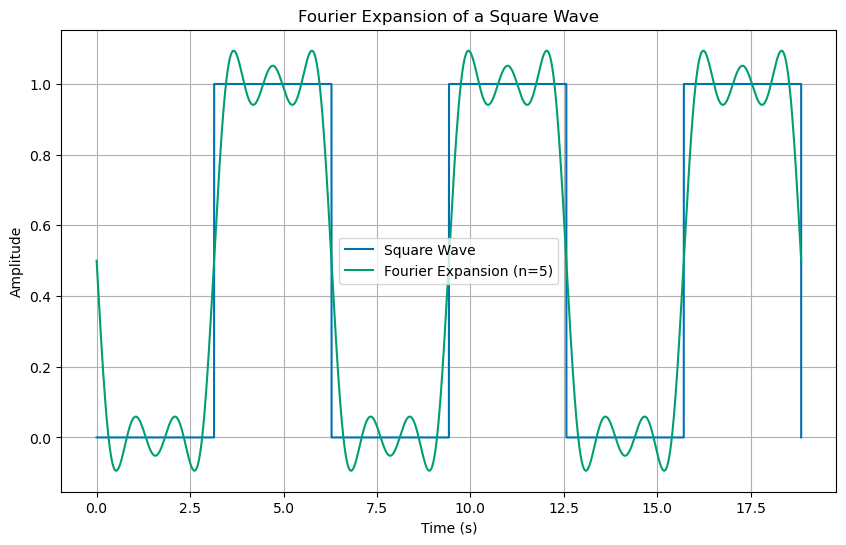

In [52]:
def fourier_expansion(t, f0, n_terms):
    f = f0/2
    for n in range(1, n_terms+1):
        f += (f0/n/np.pi)*(np.cos(n*np.pi)-1)*np.sin(2*n*np.pi*t/tau)
    return f

tau = 2*np.pi
t = np.linspace(0, 3*tau, 100000)
f0 = 1

n_terms = 5

plt.figure(figsize=(10, 6))
plt.plot(t, square_wave(t, f0, tau), label='Square Wave')
plt.plot(t, fourier_expansion(t, f0, n_terms), label='Fourier Expansion (n={})'.format(n_terms))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Fourier Expansion of a Square Wave')
plt.legend()
plt.grid(True)

You can see that the first few terms are starting to look like the square wave. We can add up more terms to get a better approximation to the square wave. Below we plot the first 11 terms of the Fourier expansion.

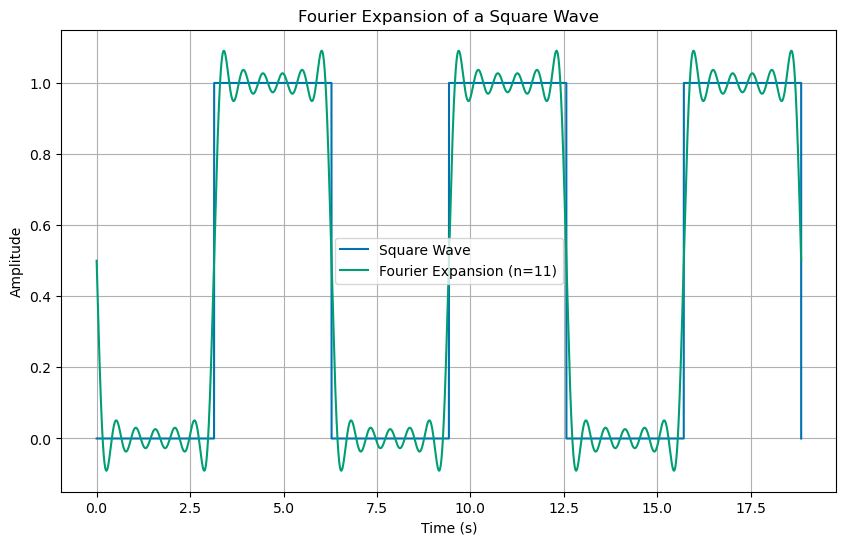

In [51]:
tau = 2*np.pi
t = np.linspace(0, 3*tau, 100000)
f0 = 1

n_terms = 11

plt.figure(figsize=(10, 6))
plt.plot(t, square_wave(t, f0, tau), label='Square Wave')
plt.plot(t, fourier_expansion(t, f0, n_terms), label='Fourier Expansion (n={})'.format(n_terms))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Fourier Expansion of a Square Wave')
plt.legend()
plt.grid(True)

This is a little strange. It seems like the reconstructed singal, the one we are adding up with the Fourier expansion, is not quite right. It seems like we are overshooting the peaks and valleys. This is where the sqaure wave is not smooth. Let's add up more terms to see if we can get a better approximation, say 101 terms.

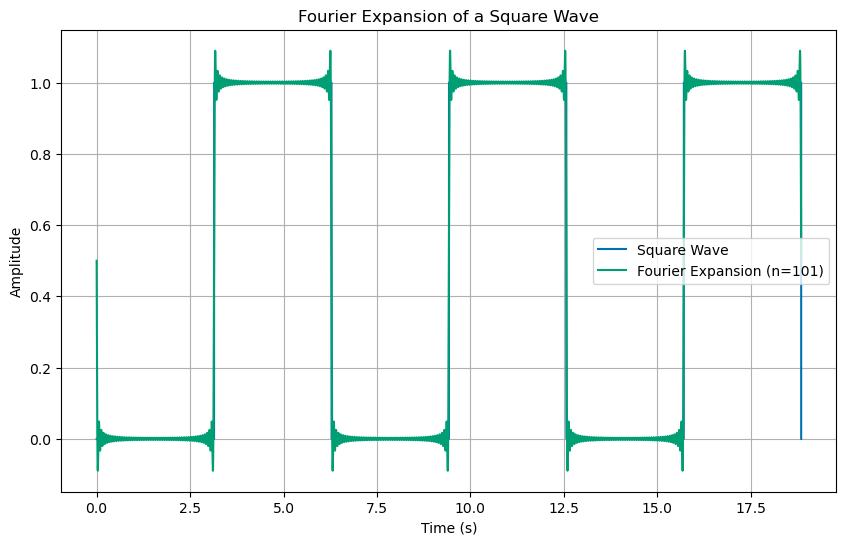

In [50]:
tau = 2*np.pi
t = np.linspace(0, 3*tau, 100000)
f0 = 1

n_terms = 101

plt.figure(figsize=(10, 6))
plt.plot(t, square_wave(t, f0, tau), label='Square Wave')
plt.plot(t, fourier_expansion(t, f0, n_terms), label='Fourier Expansion (n={})'.format(n_terms))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Fourier Expansion of a Square Wave')
plt.legend()
plt.grid(True)

That really doesn't look any better on the edges. It seems like we are getting closer to the square wave in the middle, but the edges are still not quite right. Ok, let's try 501 terms. And let's zoom in on the edges to see if we are getting any better.

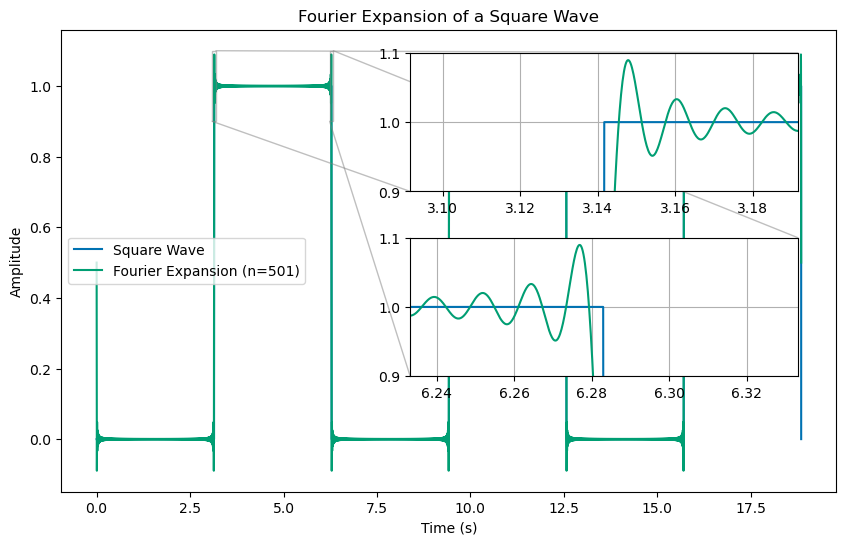

In [57]:
tau = 2*np.pi
t = np.linspace(0, 3*tau, 100000)
f0 = 1

n_terms = 501


## Figure of the whole time series with an inset of zooming in on the first transition at t=pi/2

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t, square_wave(t, f0, tau), label='Square Wave')
ax.plot(t, fourier_expansion(t, f0, n_terms), label='Fourier Expansion (n={})'.format(n_terms))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Fourier Expansion of a Square Wave')
ax.legend()


## Figure inset
epsilon = 0.05
axins = ax.inset_axes([0.45, 0.65, 0.50, 0.3]);
axins.plot(t, square_wave(t, f0, tau), label='Square Wave')
axins.plot(t, fourier_expansion(t, f0, n_terms), label='Fourier Expansion (n={})'.format(n_terms))
axins.set_xlim(np.pi-epsilon, np.pi+epsilon)
axins.set_ylim(0.9, 1.1)
axins.grid(True)
ax.indicate_inset_zoom(axins);

## Figure inset
epsilon = 0.05
axins2 = ax.inset_axes([0.45, 0.25, 0.50, 0.3])
axins2.plot(t, square_wave(t, f0, tau), label='Square Wave')
axins2.plot(t, fourier_expansion(t, f0, n_terms), label='Fourier Expansion (n={})'.format(n_terms))
axins2.set_xlim(2*np.pi-epsilon, 2*np.pi+epsilon)
axins2.set_ylim(0.9, 1.1)
axins2.grid(True)
ax.indicate_inset_zoom(axins2);

We are...sort of. This "ringing" that you see at the edges is a well-known issue called the [Gibbs phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon). It is a result of the fact that the Fourier expansion is trying to approximate a discontinuous function with a sum of continuous functions. The Fourier expansion is not very good at approximating discontinuous functions. This is why we are seeing the overshoot at the edges of the square wave. It is irreducible and will always be there. And if you are constructing signals that drive a system, this is important for issues like noise and stability, but also underlies other issues with finite signal processing.